In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [94]:
metadata_df_initial = pd.read_csv('../data/movie.metadata.tsv', sep="\t")
metadata_df_initial

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


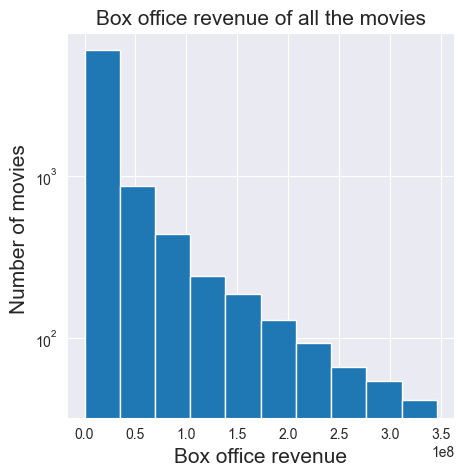

In [95]:
plt.figure(figsize=(5,5))
plt.xlabel('Box office revenue', fontsize = 15)
plt.ylabel('Number of movies ', fontsize=15)
plt.yscale("log")
plt.title('Box office revenue of all the movies', fontsize=15)
revenues = metadata_df_initial['Movie box office revenue']
threshold = 0.975
q_hi = revenues.quantile(threshold)
revenues = revenues[revenues < q_hi]
plt.hist(revenues)
plt.show()

In [96]:
metadata_df_initial['Movie release year'] = metadata_df_initial['Movie release date'].astype(str).str[:4]
metadata_df_initial = metadata_df_initial[metadata_df_initial["Movie release year"].str.contains("nan") == False]
metadata_df_initial['Movie release year'].astype(int)


profits_year = metadata_df_initial.groupby('Movie release year')['Movie box office revenue']
means_year = profits_year.mean()
sums_year = profits_year.sum()
means_year

Movie release year
1010    1.216098e+07
1888             NaN
1889             NaN
1890             NaN
1891             NaN
            ...     
2012    1.088101e+08
2013             NaN
2014             NaN
2015             NaN
2016             NaN
Name: Movie box office revenue, Length: 130, dtype: float64

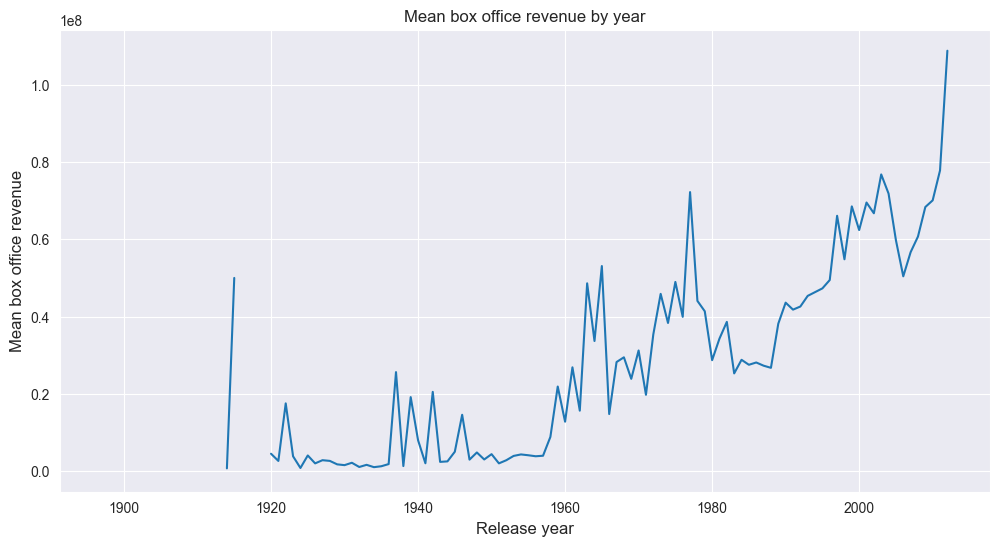

In [97]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 6)
ax.set_xlabel('Release year', fontsize = 12, )
ax.set_ylabel('Mean box office revenue', fontsize = 12)
ax.set_title('Mean box office revenue by year')
ax.set_label("Floats")
means_year = means_year[1:]
ax.plot(np.asarray(means_year.index, float), means_year.values)

plt.show()

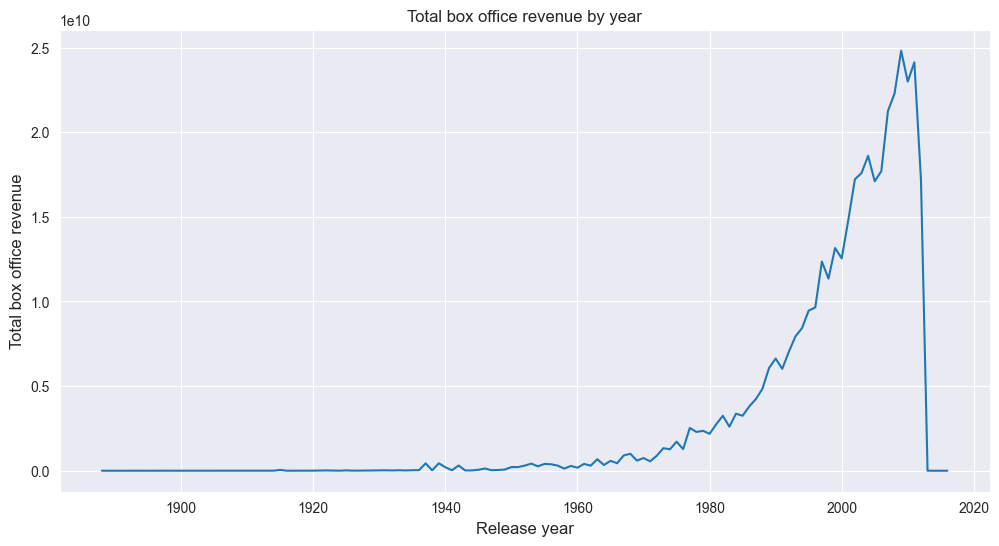

In [98]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 6)
ax.set_xlabel('Release year', fontsize = 12, )
ax.set_ylabel('Total box office revenue', fontsize = 12)
ax.set_title('Total box office revenue by year')
ax.set_label("Floats")
sums_year = sums_year[1:]
ax.plot(np.asarray(sums_year.index, float), sums_year.values)

plt.show()

In [99]:
def remove_first_and_last_chars(input_str: str) -> str:
    """
    Remove the first and last char of a string.
    :param input_str
    :return: processed string
    """
    if len(input_str) < 2:
        return ""
    return input_str[1:-1]

def separate_id_from_data(paired_string: str, remove_brackets=True) -> (str, str):
    """
    Separates "{"FreebaseID": "some string"}" strings into ("FreebaseID", "some string") tuples.
    :param paired_string: input paired string
    :param remove_brackets: if True, remove the leading and trailing curly brackets
    :return: said tuple of strings
    """
    if remove_brackets:
        paired_string = remove_first_and_last_chars(paired_string)

    ls = paired_string.split(":")
    for i, s in enumerate(ls):
        ls[i] = remove_first_and_last_chars(s.strip())

    if len(ls) < 2:
        return None, None
    return ls[0], ls[1]

def separate_ids_from_list_data(list_paired_string: str) -> (list, list):
    """
    Separates "{"FreebaseID1": "some string 1", "FreebaseID2": "some string 2", etc.}" strings
    into two lists: (["FreebaseID1", "FreebaseID2", ...], ["some string 1", "some string 2", ...]).
    :param list_paired_string: input list of pairs as string
    :return: said tuple of lists
    """
    list_paired_string = remove_first_and_last_chars(list_paired_string)
    split_pairs = list_paired_string.split(",")
    tupled_pairs = [separate_id_from_data(pair, remove_brackets=False) for pair in split_pairs]
    return [p[0] for p in tupled_pairs], [p[1] for p in tupled_pairs]

In [100]:
def col_to_col_values(column_name):
    return f"{column_name}: values"

def append_processed_columns(df: pd.DataFrame, column_name: str):
    vals = df[column_name].apply(separate_ids_from_list_data).values
    df[f"{column_name}: Freebase IDs"] = [vals[i][0] for i in range(len(vals))]
    df[col_to_col_values(column_name)] = [vals[i][1] for i in range(len(vals))]
    df.drop(column_name, axis=1, inplace=True)

In [101]:
metadata_df = pd.read_csv('../data/movie.metadata.tsv', sep="\t")
metadata_df.rename(columns={"Movie countries (Freebase ID:name tuples)": "Movie countries",
                    "Movie genres (Freebase ID:name tuples)": "Movie genres"}, inplace=True)

cols_to_process = ["Movie countries", "Movie genres", "Movie languages"]
for col in cols_to_process:
    append_processed_columns(metadata_df, col)

metadata_df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie countries: Freebase IDs,Movie countries: values,Movie genres: Freebase IDs,Movie genres: values,Movie languages: Freebase IDs,Movie languages: values
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,...",[/m/02h40lc],[English Language]
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]","[Mystery, Biographical film, Drama, Crime Drama]",[/m/02h40lc],[English Language]
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]","[Crime Fiction, Drama]",[/m/05f_3],[Norwegian Language]
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]","[Thriller, Erotic thriller, Psychological thri...",[/m/02h40lc],[English Language]
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/0345h],[Germany],[/m/07s9rl0],[Drama],[/m/04306rv],[German Language]
...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[/m/09c7w0],[United States of America],[/m/07s9rl0],[Drama],[/m/02h40lc],[English Language]
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"[/m/03rt9, /m/07ssc]","[Ireland, United Kingdom]","[/m/03bxz7, /m/07s9rl0, /m/0jtdp]","[Biographical film, Drama, Documentary]",[/m/02h40lc],[English Language]
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[/m/09c7w0],[United States of America],"[/m/06nbt, /m/01z4y]","[Satire, Comedy]",[/m/02h40lc],[English Language]
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[/m/03_3d],[Japan],"[/m/06n90, /m/0gw5n2f, /m/03k9fj, /m/0hcr, /m/...","[Science Fiction, Japanese Movies, Adventure, ...",[/m/03_9r],[Japanese Language]


In [102]:
def distinct_values(column_name):
    return set.union(*metadata_df[col_to_col_values(column_name)].apply(set).values)

all_countries = distinct_values("Movie countries")
all_genres = distinct_values("Movie genres")
all_languages = distinct_values("Movie languages")

In [103]:
def name_appended_column(prefix, val):
    return f"{prefix}: {val}"

def append_indicator_columns(df: pd.DataFrame, all_values: set, column_name: str, prefix: str):
    cols = [df[col_to_col_values(column_name)]
            .apply(lambda x: 1 if val in x else 0)
            .rename(name_appended_column(prefix, val))
            for val in all_values]
    cols.insert(0, df)
    return pd.concat(cols, axis=1)

In [104]:
if len(metadata_df.columns.values) < 700:
    for ls in [(all_countries, "Movie countries", "country"),
               (all_genres, "Movie genres", "genre"),
               (all_languages, "Movie languages", "lang")]:
        metadata_df = append_indicator_columns(metadata_df, *ls)

metadata_df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie countries: Freebase IDs,Movie countries: values,Movie genres: Freebase IDs,Movie genres: values,...,lang: Hungary,lang: Slovak Language,lang: Yiddish Language,lang: Uzbek language,lang: Pawnee Language,lang: Sumerian,lang: Plautdietsch Language,lang: Guanzhong Hua,lang: Fars,lang: Gujarati Language
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,...",...,0,0,0,0,0,0,0,0,0,0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]","[Mystery, Biographical film, Drama, Crime Drama]",...,0,0,0,0,0,0,0,0,0,0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]","[Crime Fiction, Drama]",...,0,0,0,0,0,0,0,0,0,0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]","[Thriller, Erotic thriller, Psychological thri...",...,0,0,0,0,0,0,0,0,0,0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/0345h],[Germany],[/m/07s9rl0],[Drama],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,[/m/09c7w0],[United States of America],[/m/07s9rl0],[Drama],...,0,0,0,0,0,0,0,0,0,0
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"[/m/03rt9, /m/07ssc]","[Ireland, United Kingdom]","[/m/03bxz7, /m/07s9rl0, /m/0jtdp]","[Biographical film, Drama, Documentary]",...,0,0,0,0,0,0,0,0,0,0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,[/m/09c7w0],[United States of America],"[/m/06nbt, /m/01z4y]","[Satire, Comedy]",...,0,0,0,0,0,0,0,0,0,0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,[/m/03_3d],[Japan],"[/m/06n90, /m/0gw5n2f, /m/03k9fj, /m/0hcr, /m/...","[Science Fiction, Japanese Movies, Adventure, ...",...,0,0,0,0,0,0,0,0,0,0


In [105]:
from functools import cmp_to_key

def retrieve_n_most_frequent(df, n, all_vals, prefix):
    def comparator(val1, val2):
        mean_val1 = df[name_appended_column(prefix, val1)].mean()
        mean_val2 = df[name_appended_column(prefix, val2)].mean()
        return mean_val1 - mean_val2
    return sorted(all_vals, key=cmp_to_key(comparator), reverse=True)[:n]

def retrieve_frequent(df, all_vals, prefix, freq_threshold=0.05):
    return list(
        filter(
            lambda val: df[name_appended_column(prefix, val)].mean() > freq_threshold,
            all_vals
        )
    )

In [106]:
most_freq_genres = retrieve_n_most_frequent(metadata_df, 30, all_genres, "genre")

In [107]:
reduced = metadata_df[metadata_df["Movie box office revenue"].notnull()]
sig_level = 0.05
correlated_genres_to_revenue = []

for genre in most_freq_genres:
    res = stats.spearmanr(reduced["Movie box office revenue"], reduced[name_appended_column("genre", genre)])
    print(f"{genre} :: corr = {res.correlation}, p-value = {res.pvalue}")
    if res.pvalue < sig_level:
        correlated_genres_to_revenue.append(genre)

Drama :: corr = -0.0884198087071858, p-value = 4.700756169534344e-16
Comedy :: corr = 0.0987949264809276, p-value = 1.1252836634517524e-19
Romance Film :: corr = 0.0023182830038962266, p-value = 0.8317517216759166
Black-and-white :: corr = -0.19043617176490096, p-value = 1.9364404608536852e-69
Action :: corr = 0.2006732050790237, p-value = 4.694889725205454e-77
Thriller :: corr = 0.1839936523482882, p-value = 7.2652888741231656e-65
Short Film :: corr = -0.010220590261029375, p-value = 0.3489265866396539
World cinema :: corr = -0.07945969468001594, p-value = 3.020385326018935e-13
Crime Fiction :: corr = 0.05451840889330515, p-value = 5.734009153448597e-07
Indie :: corr = -0.22417629927882496, p-value = 3.539076430628446e-96
Documentary :: corr = -0.11342578524204991, p-value = 1.8398853028461515e-25
Horror :: corr = 0.040941396276008374, p-value = 0.0001743271197207884
Silent film :: corr = -0.04904716523920155, p-value = 6.874023750513465e-06
Adventure :: corr = 0.1858832055833701, p-v

In [108]:
print(correlated_genres_to_revenue)
print(len(correlated_genres_to_revenue))

['Drama', 'Comedy', 'Black-and-white', 'Action', 'Thriller', 'World cinema', 'Crime Fiction', 'Indie', 'Documentary', 'Horror', 'Silent film', 'Adventure', 'Family Film', 'Action/Adventure', 'Comedy film', 'Musical', 'Animation', 'Mystery', 'Science Fiction', 'Fantasy', 'Romantic comedy', 'Japanese Movies', 'Western', 'Crime Thriller']
24


In [109]:
print(retrieve_frequent(metadata_df, all_genres, "genre", freq_threshold=0.03))

['Documentary', 'Animation', 'Horror', 'Drama', 'Musical', 'Comedy film', 'Thriller', 'Science Fiction', 'Romance Film', 'Romantic comedy', 'Black-and-white', 'Family Film', 'Crime Fiction', 'Action/Adventure', 'Short Film', 'Romantic drama', 'Action', 'World cinema', 'Silent film', 'War film', 'Comedy', 'Adventure', 'Fantasy', 'Mystery', 'Indie']
